In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
sns.set()
pd.options.display.max_rows=9999

In [3]:
# Reading the Data set
fifa=pd.read_csv(r"E:\Data_science_Project\Data_Science_project\Fifa_Analysis\FIFA_data.csv")

In [4]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
not_body = {'Messi':'Normal','C. Ronaldo':'Normal','Neymar':'Normal','Courtois':'Normal',
'PLAYER_BODY_TYPE_25':'Normal','Shaqiri':'Normal','Akinfenwa':'Normal','Normal':'Normal',
'Lean':'Lean','Stocky':'Stocky'}
not_body

{'Messi': 'Normal',
 'C. Ronaldo': 'Normal',
 'Neymar': 'Normal',
 'Courtois': 'Normal',
 'PLAYER_BODY_TYPE_25': 'Normal',
 'Shaqiri': 'Normal',
 'Akinfenwa': 'Normal',
 'Normal': 'Normal',
 'Lean': 'Lean',
 'Stocky': 'Stocky'}

In [6]:
fifa['Body Type']=fifa['Body Type'].map(not_body)

In [7]:
fifa['Body Type'].value_counts()
#Cleaned a column 'Body Type'

Normal    10602
Lean       6417
Stocky     1140
Name: Body Type, dtype: int64

# Checking on Data & Dropping Irrelevant Columns

In [8]:
fifa.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [9]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [11]:
fifa.drop('Loaned From',axis =1,inplace=True)

In [12]:
fifa.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Real Face                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW        

In [13]:
fifa.dropna(subset = ['Volleys'],inplace=True)

In [14]:
fifa.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until         241
Height                         0
Weight                         0
LS                          2037
ST                          2037
RS                          2037
LW        

# Dealing with column [Height]

In [15]:
fifa["Height"].head(50)

0      5'7
1      6'2
2      5'9
3      6'4
4     5'11
5      5'8
6      5'8
7      6'0
8      6'0
9      6'2
10     6'0
11     6'0
12     6'2
13     5'8
14     5'6
15    5'10
16     6'2
17     5'9
18     6'2
19     6'6
20     6'2
21     6'1
22     6'4
23     5'8
24     6'2
25    5'10
26     5'9
27     6'1
28    5'11
29     5'4
30     5'9
31    5'11
32     5'8
33     6'2
34     6'3
35     5'9
36     6'1
37     6'2
38     6'1
39     6'0
40     6'4
41     6'4
42     6'0
43    5'11
44     6'2
45     6'4
46     6'1
47     6'3
48     6'1
49     5'7
Name: Height, dtype: object

In [16]:
height_temp=fifa["Height"].str.split("'",expand=True)
height_temp=height_temp.astype('int64')
fifa['Height']=height_temp.iloc[:,0]*0.3 + height_temp.iloc[:,1]*(0.175)
fifa['Height']

0        2.725
1        2.150
2        3.075
3        2.500
4        3.425
         ...  
18202    3.075
18203    2.325
18204    2.900
18205    3.250
18206    3.250
Name: Height, Length: 18159, dtype: float64

# Dropping Few more element

In [17]:
fifa.drop(['Special','Skill Moves','Real Face','Work Rate','Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Contract Valid Until'],axis = 1,inplace = True)

In [18]:
fifa.loc[fifa['LS'].isnull(),['LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM'
, 'RAM', 'LM', 'LCM', 'CM', 'RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB',
'CB', 'RCB', 'RB']] = '0+0'

In [19]:
fifa.dropna(subset = ['Position'],inplace=True)

# Going through the data

In [20]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [21]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [22]:
player_positions = ['LS', 'ST', 'RS', 'LW',
'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# Dealing with Performance of Players at Different Positions

In [23]:
fifa["LS"]

0        88+2
1        91+3
2        84+3
3         0+0
4        82+3
         ... 
18202    42+2
18203    45+2
18204    45+2
18205    47+2
18206    43+2
Name: LS, Length: 18147, dtype: object

In [24]:
for x in player_positions:
    temp = fifa[x].str.split("+",expand=True)
    temp = temp.astype('int32')
    fifa[x] = temp.iloc[:,0]

In [25]:
fifa["Weight"]

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18147, dtype: object

# Converting Weights from Pounds to KG

In [26]:
temp_weight = fifa['Weight'].str.split('l',expand = True)
temp_weight = temp_weight[0].astype('float')
fifa['Weight']=temp_weight.values*0.453592
fifa['Weight']

0        72.121128
1        83.007336
2        68.038800
3        76.203456
4        69.853168
           ...    
18202    60.781328
18203    77.110640
18204    67.131616
18205    69.853168
18206    79.832192
Name: Weight, Length: 18147, dtype: float64

# Dealing with Currency Column

In [27]:
fifa[["Value","Wage"]]

,Value,Wage
0,€110.5M,€565K
1,€77M,€405K
2,€118.5M,€290K
3,€72M,€260K
4,€102M,€355K
...,...,...
18202,€60K,€1K
18203,€60K,€1K
18204,€60K,€1K
18205,€60K,€1K


In [28]:
leng = len(fifa["Value"])
leng

18147

In [29]:
currency_column = ['Value','Wage']
for x in currency_column:
    leng = len(fifa[x].values)
    temp_array = list([])
    for y in range(leng):
        if len(fifa[x].values[y]) == 2:
            temp_array.append(0.0)
        elif fifa[x].values[y][-1] == 'K':
            temp_array.append(float(fifa[x].values[y][1:-1])*1000)
        else:
            temp_array.append(float(fifa[x].values[y][1:-1])*1000000)
    fifa[x] = temp_array

In [30]:
fifa["Value"]

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18147, dtype: float64

In [31]:
fifa['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18147, dtype: object

In [32]:
fifa['Release Clause']=fifa['Release Clause'].fillna("0")

In [33]:
import numpy as np

leng = len(fifa['Release Clause'].values)
temp_array = list([])
for y in range(leng):
    if len(fifa['Release Clause'].values[y]) == 1:
        temp_array.append(np.NaN)
    elif len(fifa['Release Clause'].values[y]) == 2:
        temp_array.append(0.0)
    elif (fifa['Release Clause'].values[y][-1] == 'K'):
        temp_array.append(float(fifa['Release Clause'].values[y][1:-1])*1000)
    else:
        temp_array.append(float(fifa['Release Clause'].values[y][1:-1])*1000000)
fifa['Release Clause'] = temp_array


In [34]:
fifa['Release Clause'].isnull().sum()

1504

# Dealing with NULL value

In [35]:
fifa.loc[fifa['Club'].isnull(),'Release Clause'] = 0.0
fifa[fifa['Club'].isnull()].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,L. Paredes,24,Argentina,80,85,NaN,0.0,0.0,Right,2.0,...,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,0.0
538,A. Granqvist,33,Sweden,80,80,NaN,0.0,0.0,Right,2.0,...,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,0.0
568,A. Lunev,26,Russia,79,81,NaN,0.0,0.0,Right,1.0,...,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,0.0
677,I. Smolnikov,29,Russia,79,79,NaN,0.0,0.0,Right,2.0,...,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,0.0
874,A. Dzyuba,29,Russia,78,78,NaN,0.0,0.0,Right,2.0,...,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,0.0


In [36]:
fifa['Club'].fillna('No Club',inplace=True)

# Creating Dummy Variables & Imputing the NULL values

In [37]:
fifa['Dummie_club'] = fifa['Club']
fifa['Dummie_club']=fifa.Dummie_club.astype("category").cat.codes

In [38]:
fifa["Dummie_club"]

0        212
1        326
2        436
3        375
4        374
        ... 
18202    165
18203    588
18204    122
18205    587
18206    587
Name: Dummie_club, Length: 18147, dtype: int16

In [39]:
X = fifa[['Dummie_club','Value','Wage','Release Clause']]
imputer = KNNImputer(n_neighbors=3)

In [40]:
X = imputer.fit_transform(X)
fifa['Release Clause'] = X[:,3]
fifa.drop('Dummie_club',axis = 1,inplace = True)

#  Combining the column to bring Coherence 

In [41]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [42]:
fifa['Defense'] = (fifa['LWB']+ fifa['RWB']+fifa['LB'] +fifa['LCB'] +fifa['CB'] +fifa['RCB'] +fifa['RB'])/7

In [43]:
fifa['Center'] = (fifa['LAM']+fifa['CAM']+ fifa['RAM'] +fifa['LM'] +fifa['LCM'] +fifa['CM'] +fifa['RCM'] +fifa['RM'] +fifa['LDM'] +fifa['CDM'] +fifa['RDM'])/11

In [44]:
fifa['Forward'] = (fifa['LS'] +fifa['ST'] +fifa['RS'] +fifa['LW'] +fifa['LF'] +fifa['CF'
] +fifa['RF'] +fifa['RW'])/8

In [45]:
fifa['GK'] = (fifa['GKDiving']+fifa['GKHandling']+fifa['GKKicking']+fifa['GKPositioning'
]+fifa['GKReflexes'])/5

In [46]:
fifa = fifa.reset_index(drop = True)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defense,Center,Forward,GK
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,6.0,11.0,15.0,14.0,8.0,226500000.0,55.285714,81.454545,90.875,10.8
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,7.0,11.0,15.0,14.0,11.0,127100000.0,58.714286,78.727273,90.125,11.6
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,9.0,9.0,15.0,15.0,11.0,228100000.0,55.857143,78.727273,87.125,11.8
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,90.0,85.0,87.0,88.0,94.0,138600000.0,0.000000,0.000000,0.000,88.8
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,15.0,13.0,5.0,10.0,13.0,196400000.0,71.142857,84.727273,85.125,11.2


# Beginning with the Analysis

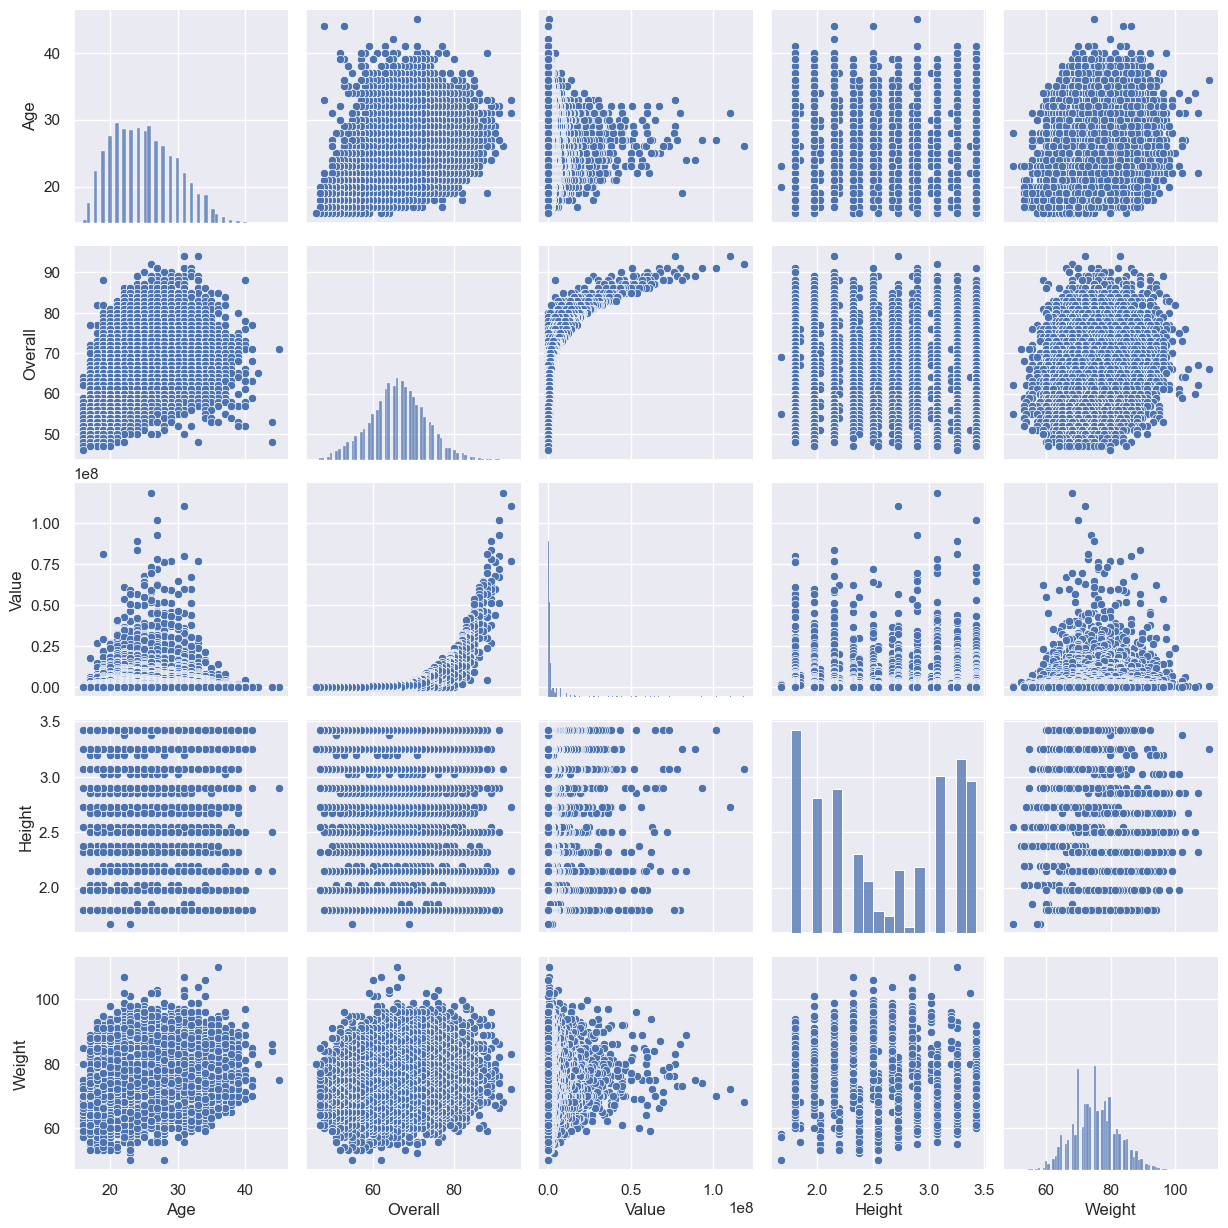

In [47]:
sns.pairplot(fifa[['Age','Overall', 'Value','Height','Weight']])

# Grouping Refined Data


In [51]:
fifa.groupby('Nationality').aggregate({'Overall':['mean','min','max'],'Age':['mean','min','max'],'Nationality':'count'}).reset_index().sort_values(by=('Nationality','count'),ascending = False).rename(columns = {'Nationality':'Player'}).head(15)

Player    Overall                Age         Player
                               mean min max       mean min max  count
46               England  63.433917  46  89  24.022933  16  44   1657
59               Germany  66.097071  47  90  24.343933  17  39   1195
139                Spain  69.705882  51  91  25.330532  16  39   1071
6              Argentina  68.579060  51  94  26.209402  16  41    936
55                France  67.817783  50  89  24.620198  16  41    911
20                Brazil  71.273939  48  92  27.643636  17  40    825
78                 Italy  68.184549  47  89  25.941345  17  40    699
31              Colombia  65.587662  48  88  25.245130  16  40    616
81                 Japan  62.621339  47  81  26.158996  17  42    478
108          Netherlands  67.665929  54  86  24.015487  16  40    452
144               Sweden  63.626263  47  85  24.851010  16  37    396
30              China PR  59.900000  47  76  26.084615  17  39    390
29                 Chile  65.015464  47  85  25.064433  17  38    388
126  Republic of Ireland  60.885870  47  80  24.668478  16  38    368
101               Mexico  65.427397  50  82  24.317808  17  45    365

# Getting Vital Stats

In [52]:
fifa.groupby('Club').aggregate({'Overall':['mean','min','max'],'Age':['mean','min','max'],'Nationality':'count','Height':'mean','Weight':'mean'}).reset_index().sort_values(by=('Overall','mean'),ascending = False).rename(columns = {'Nationality':'Player'}).head(15)

Club    Overall                Age         Player  \
                               mean min max       mean min max  count   
326             Juventus  82.280000  62  94  27.160000  18  37     25   
398               Napoli  80.000000  70  88  25.920000  20  32     25   
315                Inter  79.750000  64  88  27.458333  20  35     24   
471          Real Madrid  78.242424  62  91  24.030303  17  32     33   
382                Milan  78.074074  66  88  25.000000  18  35     27   
212         FC Barcelona  78.030303  61  94  23.848485  18  32     33   
436  Paris Saint-Germain  77.433333  62  92  24.566667  17  40     30   
483                 Roma  77.423077  64  85  25.653846  18  34     26   
375    Manchester United  77.242424  63  91  24.757576  17  35     33   
505           SL Benfica  77.000000  67  84  24.500000  18  34     28   
214    FC Bayern München  77.000000  56  90  24.310345  17  35     29   
134              Chelsea  76.787879  56  91  25.212121  17  38     33   
374      Manchester City  76.727273  54  91  23.909091  17  35     33   
584    Tottenham Hotspur  76.696970  61  89  24.606061  17  34     33   
232             FC Porto  76.678571  66  85  24.964286  18  37     28   

       Height     Weight  
         mean       mean  
326  2.386000  80.104347  
398  2.445000  74.316513  
315  2.767708  76.940543  
471  2.617424  75.571176  
382  2.627778  76.472251  
212  2.513636  74.196655  
436  2.558333  75.492829  
483  2.432692  77.093194  
375  2.426515  75.337508  
505  2.585714  76.738047  
214  2.723276  78.455775  
134  2.526515  79.062460  
374  2.573485  74.127929  
584  2.449242  77.756665  
232  2.424107  75.182874


# Plotting few simple bar graph

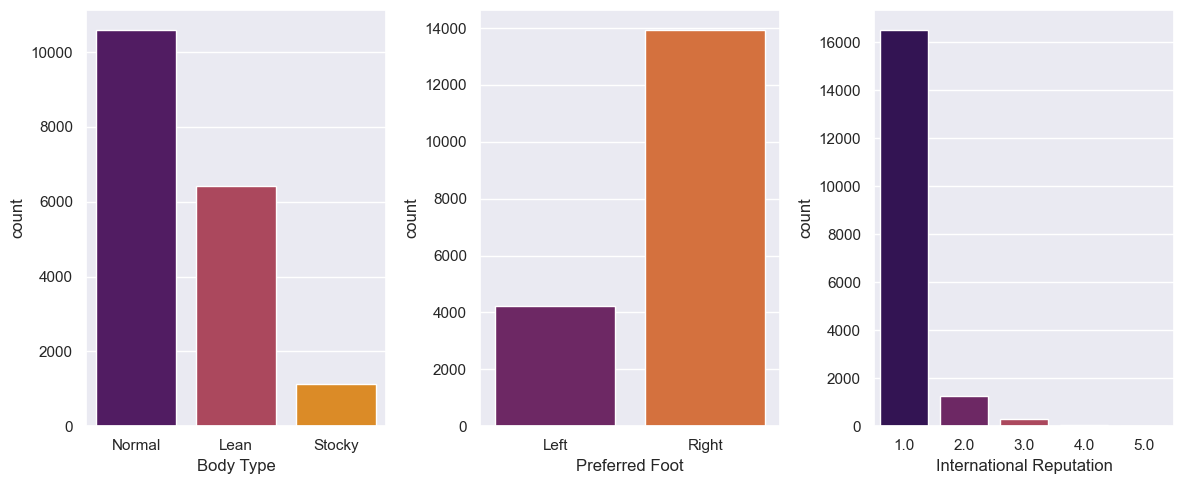

In [53]:
fig=plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(131)#add first subplot in layout that has 3 rows and 2 columns
ax2 = fig.add_subplot(132)#add second subplot in layout that has 3 rows and 2 columns
ax3 = fig.add_subplot(133)#add third subplot in layout that has 3 rows and 2 columns
sns.countplot(x='Body Type',data = fifa,ax = ax1,palette='inferno')
sns.countplot(x='Preferred Foot',data = fifa,ax = ax2,palette='inferno')
sns.countplot(x='International Reputation',data = fifa,ax = ax3,palette='inferno')
fig.tight_layout()
plt.show()

# Countplot Based on Positions


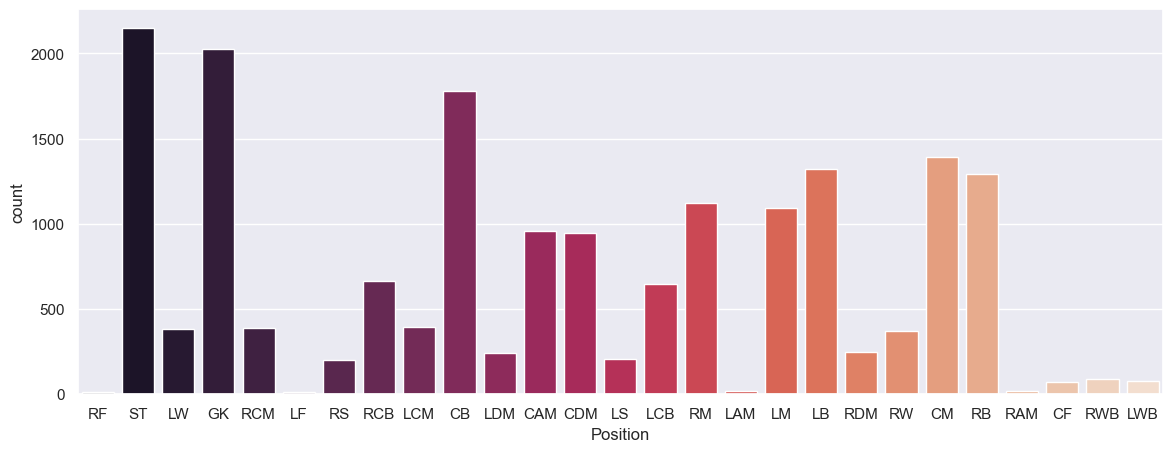

In [54]:
fig = plt.figure(figsize=(14,5))
sns.countplot(x='Position',data = fifa,palette='rocket')
plt.show()

# Wage vs. Overall Scatter Plots

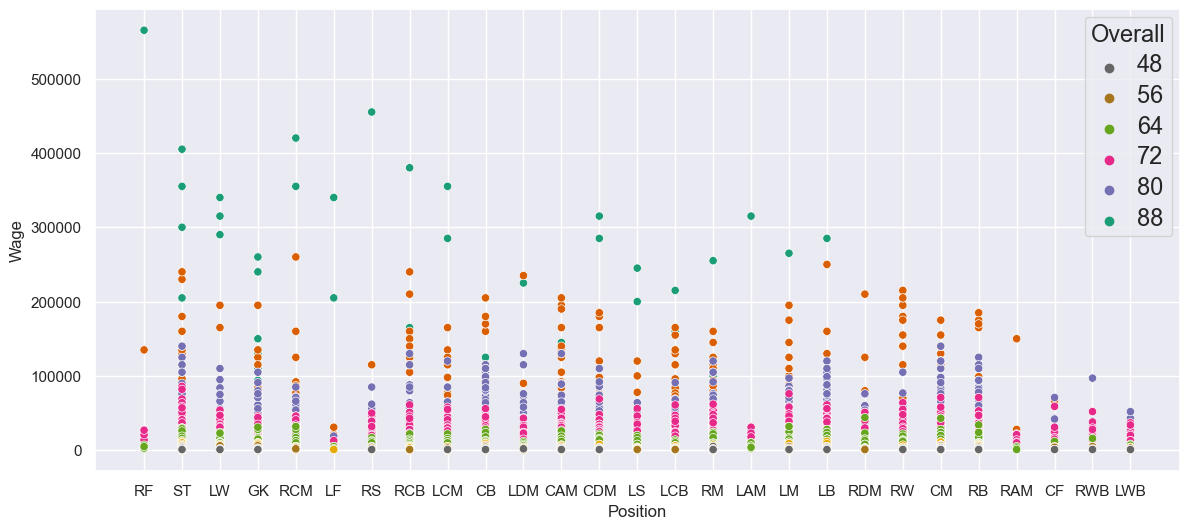

In [56]:
fig = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x = 'Position',y = 'Wage',data = fifa,hue='Overall',palette='Dark2_r')
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') # for legend title
plt.show()

# Comparing Teams by Penalties


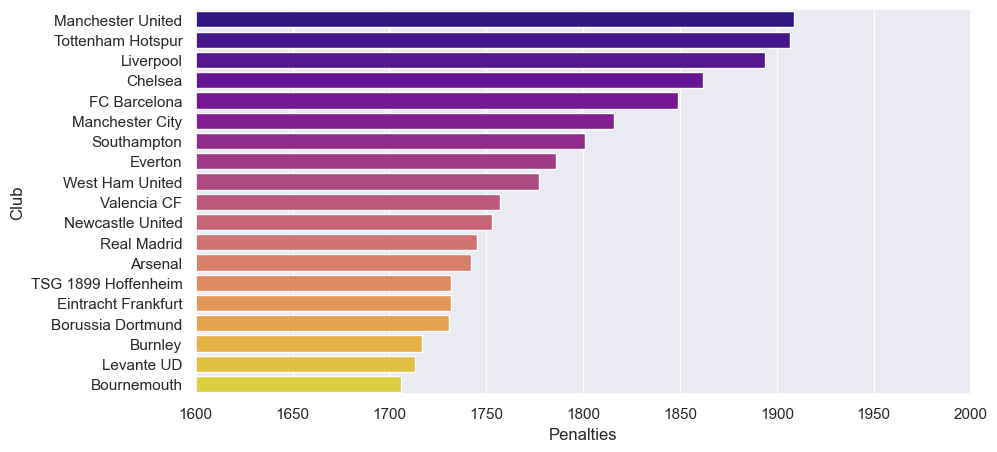

In [58]:
most_penalties = fifa.groupby('Club').Penalties.sum().reset_index().sort_values(by = 'Penalties',ascending = False).head(20)[1:20]
fig = plt.figure(figsize = (10,5))
sns.barplot(x='Penalties',y = 'Club',data = most_penalties,palette='plasma')
plt.xlim(1600,2000)
plt.show()

# Comparison based on Expenditure

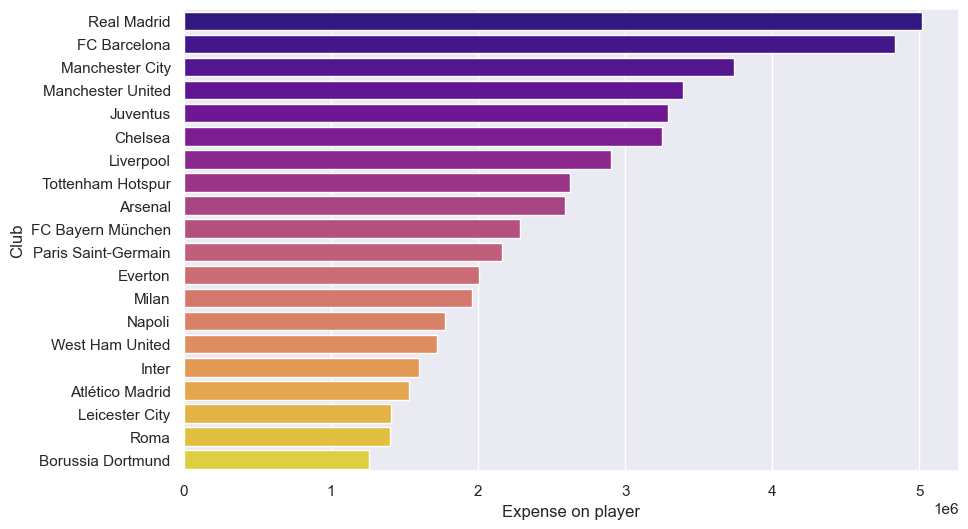

In [60]:
Player_expense = fifa.groupby('Club').Wage.sum().reset_index().sort_values(by = 'Wage',ascending = False).head(20)
fig = plt.figure(figsize = (10,6))
sns.barplot(x='Wage',y = 'Club',data = Player_expense,palette='plasma')
plt.xlabel('Expense on player')
plt.show()

# Players by General Football Skills

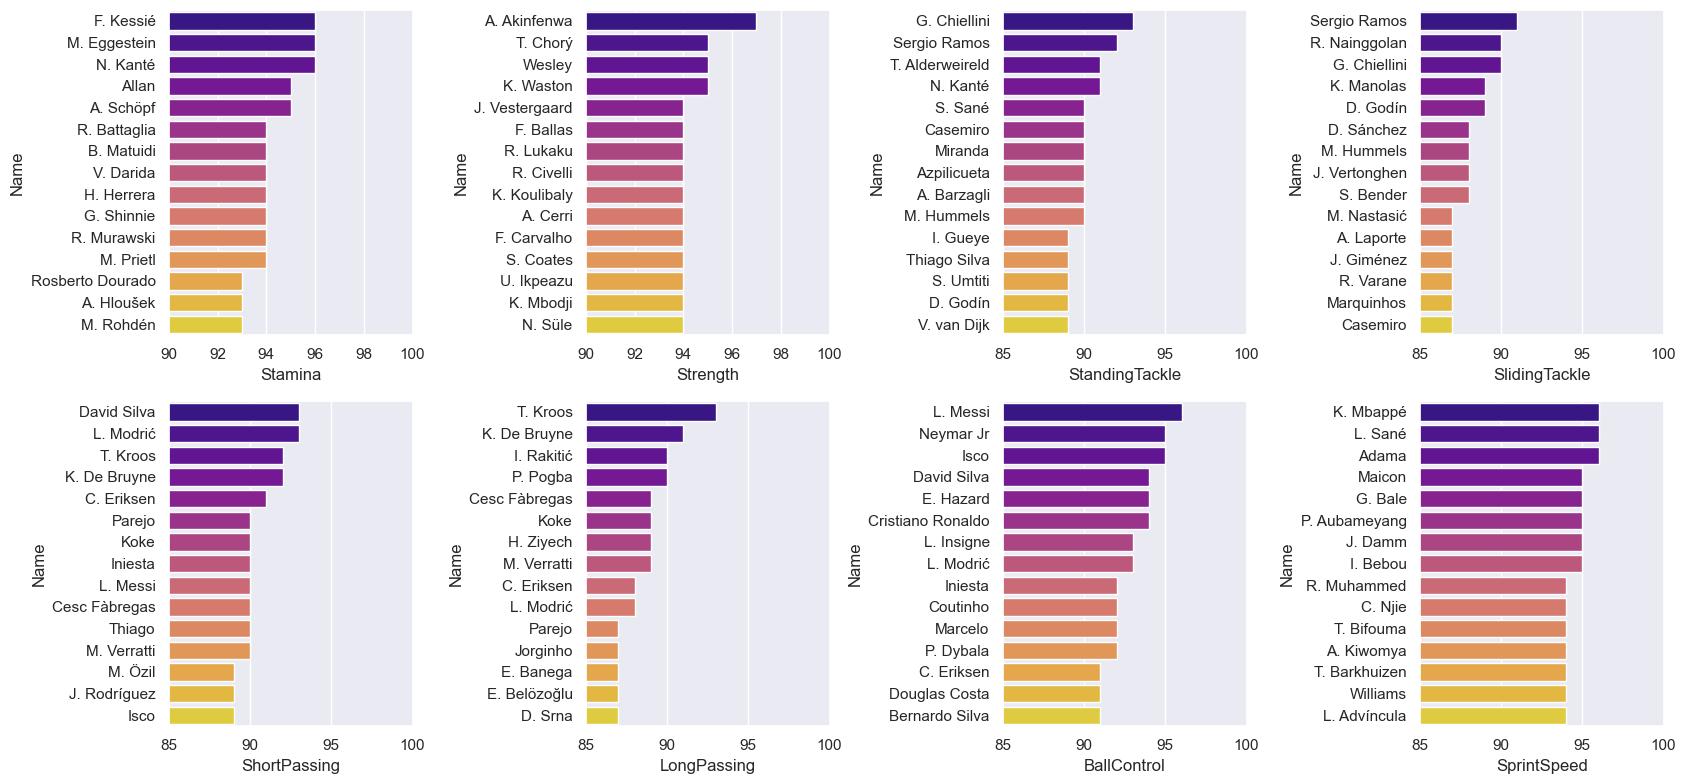

In [65]:
fig=plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)
sns.barplot(x='Stamina',y = 'Name',data = fifa.sort_values(by = 'Stamina',ascending = False)[0:15],ax = ax1,palette='plasma')
sns.barplot(x='Strength',y = 'Name',data = fifa.sort_values(by = 'Strength',ascending =False)[0:15],ax = ax2,palette='plasma')
sns.barplot(x='StandingTackle',y = 'Name',data = fifa.sort_values(by = 'StandingTackle',ascending = False)[0:15],ax = ax3,palette='plasma')
sns.barplot(x='SlidingTackle',y = 'Name',data = fifa.sort_values(by = 'SlidingTackle',ascending = False)[0:15],ax = ax4,palette='plasma')
sns.barplot(x='ShortPassing',y = 'Name',data = fifa.sort_values(by = 'ShortPassing',ascending = False)[0:15],ax = ax5,palette='plasma')
sns.barplot(x='LongPassing',y = 'Name',data = fifa.sort_values(by = 'LongPassing',ascending = False)[0:15],ax = ax6,palette='plasma')
sns.barplot(x='BallControl',y = 'Name',data = fifa.sort_values(by = 'BallControl',ascending = False)[0:15],ax = ax7,palette='plasma')
sns.barplot(x='SprintSpeed',y = 'Name',data = fifa.sort_values(by = 'SprintSpeed',ascending = False)[0:15],ax = ax8,palette='plasma')
fig.tight_layout()
ax1.set_xlim(90,100)
ax2.set_xlim(90,100)
ax3.set_xlim(85,100)
ax4.set_xlim(85,100)
ax5.set_xlim(85,100)
ax6.set_xlim(85,100)
ax7.set_xlim(85,100)
ax8.set_xlim(85,100)
plt.show()